## A04 Braitenberg Vehicles: Open Ended

This experiment takes place in a 2D space.  There is a Braitenberg vehicle that always starts in the middle of the room (i.e., at the origin x=0,y=0) with a random orientation/heading. The vehicle has two sensors and two motors. The sensors are placed on the left and right of the body of the vehicle and they can sense the intensity of light in their immediate vecinity. The closer a sensor is to the light, the higher the intensity of the sensory stimuli (from 0 dark to 1 light). The motors are placed on the left and right hand sides of the vehicle and can drive the vehicle forward (if both left and right are set to 1), left (if left is set to lower value than right), and right (if right is set to lower value than left). The motors can only be set to values between 0 and 1. During an experiment, a light source is placed at a random location in the environment. The light is placed always the same distance from the vehicle (10 units of space away from the vehicle) but with a different angle (the angle chosen at random). 

The class below implements the vehicle and the light. It is missing the contents of the "think" method, which allow the agent to use the sensory information to make the motors do something. Everything else is implemented.

In [1]:
import numpy as np

In [2]:
class Vehicle:

    def __init__(self):
        
        self.xpos = 0.0                                       # agent's x position, starts in middle of world
        self.ypos = 0.0                                       # agent's y position, starts in middle of world
        self.orientation = np.random.random()*2*np.pi         # agent's orientation, starts at random
        self.velocity = 0.0                                   # agent's velocity, starts at 0
        self.radius = 1.0                                     # the size/radius of the vehicle
        self.leftsensor = 0.0                                 # left sensor value
        self.rightsensor = 0.0                                # right sensor value
        self.leftmotor  = 1.0                                 # left motor output
        self.rightmotor = 1.0                                 # right motor output
        
        # Attributes to determine the placement of the sensors
        self.angleoffset = np.pi/2                                                 # left/right sensor angle offset
        self.rs_xpos = self.radius * np.cos(self.orientation + self.angleoffset)   # right sensor x position
        self.rs_ypos = self.radius * np.sin(self.orientation + self.angleoffset)   # right sensor y position
        self.ls_xpos = self.radius * np.cos(self.orientation - self.angleoffset)   # left sensor x position
        self.ls_ypos = self.radius * np.sin(self.orientation - self.angleoffset)   # left sensor y position

    def sense(self,light):
        
        # Calculate the distance of the light for each of the sensors
        self.leftsensor = 1 - np.sqrt((self.ls_xpos-light.x)**2 + (self.ls_ypos-light.y)**2)/10
        self.leftsensor = np.clip(self.leftsensor,0,1)
        self.rightsensor = 1 - np.sqrt((self.rs_xpos-light.x)**2 + (self.rs_ypos-light.y)**2)/10
        self.rightsensor = np.clip(self.rightsensor,0,1)

    def think(self):
        ## Delete the pass command and add your code in this method
        ## In particular, think about activating the right and left motors 
        ## in the way that would make the vehicle move towards the light source
        ## (but also, feel free to change anything else in the code)
        pass

    def move(self):
        
        # Update the orientation and velocity of the vehicle based on the left and right motors
        self.rightmotor = np.clip(self.rightmotor,0,1)
        self.leftmotor  = np.clip(self.leftmotor,0,1)
        self.orientation += ((self.leftmotor - self.rightmotor)/10) + np.random.normal(0,0.1)
        self.velocity = ((self.rightmotor + self.leftmotor)/2)/50
        
        # Update position of the agent
        self.xpos += self.velocity * np.cos(self.orientation) 
        self.ypos += self.velocity * np.sin(self.orientation)  
        
        # Update position of the sensors
        self.rs_xpos = self.xpos + self.radius * np.cos(self.orientation + self.angleoffset)
        self.rs_ypos = self.ypos + self.radius * np.sin(self.orientation + self.angleoffset)
        self.ls_xpos = self.xpos + self.radius * np.cos(self.orientation - self.angleoffset)
        self.ls_ypos = self.ypos + self.radius * np.sin(self.orientation - self.angleoffset)

    def distance(self,light):
        return np.sqrt((self.x-light.x)**2 + (self.y-light.y)**2)

class Light:  

    def __init__(self):
        angle = np.random.random()*2*np.pi
        self.x = 10.0 * np.cos(angle)
        self.y = 10.0 * np.sin(angle)

(3 points) Your job is to "wire up" the insides of this Braitenberg vehicle so that it can find the light. That is, your job is to go into the "think" method and set the right and left motors to something, presumably based on the sensory information. In the next cell, tell us how are you going to take in the sensory input and process it or transform it into motor output, so that the vehicle finds the light? Explain your desired solution before writing the code for it. 

Once you've coded up your vehicle, there are a couple of things we would like to know and see from your vehicle.  First, what does one trajectory of this vehicle look like from a bird’s eye view? Does it find the light? If it does, tell us what change causes it to go towards the light and away from the light. Does the agent need to modify its velocity or can the agent find the light efficiently by running at a constant velocity of say 0.01? Show your work.

In [3]:
import matplotlib.pyplot as plt

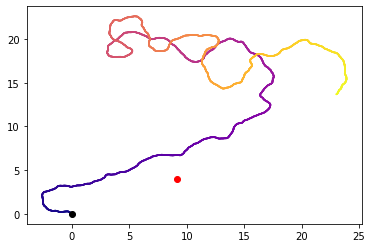

In [5]:
a = Vehicle()
b = Light()
duration = 5000
xpos = np.zeros(duration)
ypos = np.zeros(duration)
for t in range(duration):
    a.sense(b)
    a.think()
    a.move()
    xpos[t] = a.xpos
    ypos[t] = a.ypos
plt.plot(0.0,0.0,"ko")
plt.scatter(xpos,ypos,s=0.5,c=range(duration),cmap="plasma")
plt.plot(b.x,b.y,"ro")
plt.show()

(3 points) Second, if you ran the same experiment 100 times, with lights placed in different random locations (but at the same initial distance from the vehicle), what does the plot of the average distance of the vehicle to the light over time look like?  If your vehicle can find the light, then this plot should start at the initial distance (10 units of space at time zero) and then progressively get closer and closer to the light source, nearing 0 distance. 

(6 points) Final, open ended question: Choose your own adventure. Attempt to explore a different vehicle or attempt to answer any other additional question about this autonomous agent. For example, what is the role of noise on the orientation? Does noise help the agent do a better job at finding the light or does it hinder it? What is the effect of the amount of noise on the performance of this lightfinder. Or, can this same agent find a light that is moving randomly while the agent is try to find it? Show your work. Discuss your findings.